In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%cd Z:\PPMI_Data\Excels\NonMotors\The251

df = pd.read_csv('Feats45_APPRDX_HYS_Category.csv')
df = df[(df['HYS'] < 4)]
df = df.drop(['PATNO','Age','Gender'], axis = 1)
df.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251


,HYS,APPRDX,Benton,Clock,COGSTATE,Epworth,Geriatric_Depression,Hopkins_Recall,Hopkins_Recog,LetterNumber,...,SCOPA_Sex,Semantic,Education,Hand,STAIS,STAIA,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,2,Patient,Normal,Mild,Normal,Normal,Mild,Normal,Normal,Mild,...,Normal,Severe,Mild,Normal,Normal,Normal,Mild,Normal,Normal,Severe
1,2,Patient,Normal,Normal,Normal,Mild,Normal,Normal,Normal,Mild,...,Normal,Severe,Mild,Normal,Normal,Normal,Mild,Mild,Mild,Normal


# Combined

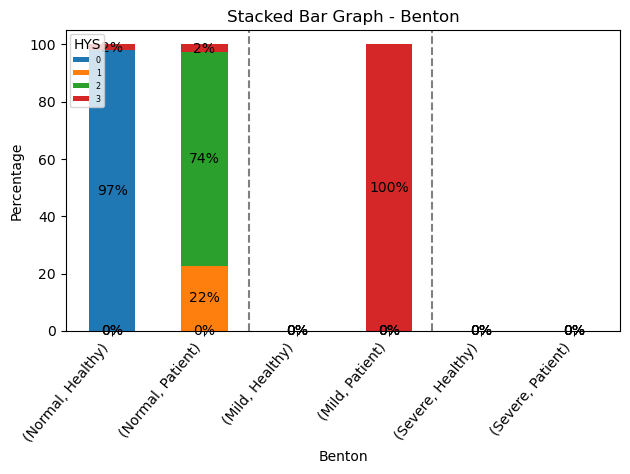

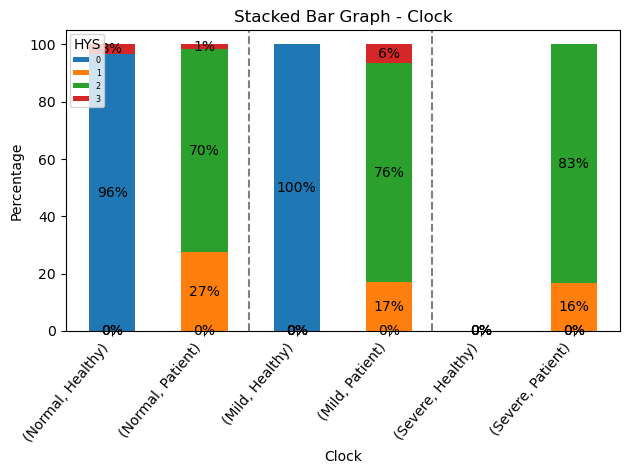

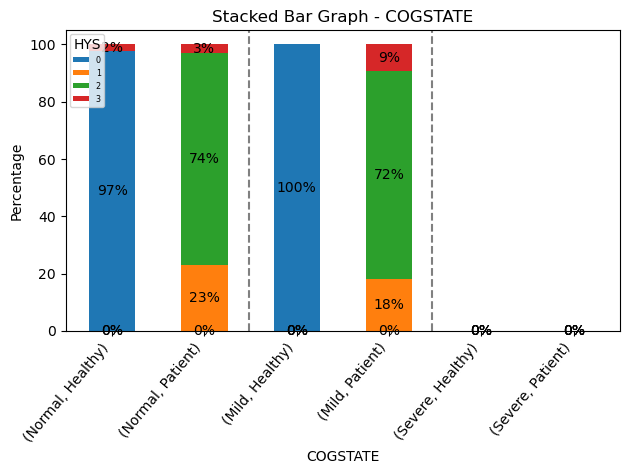

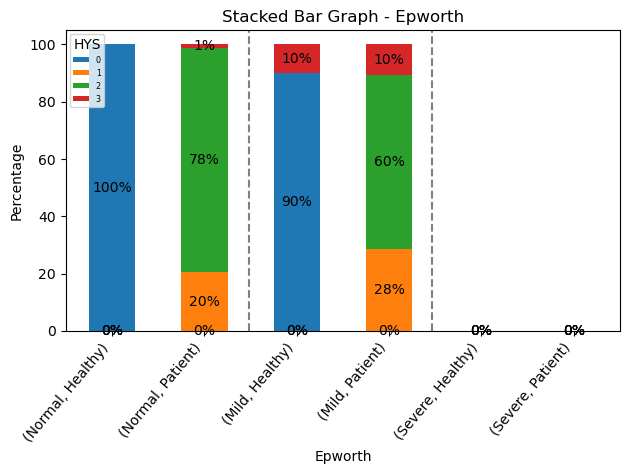

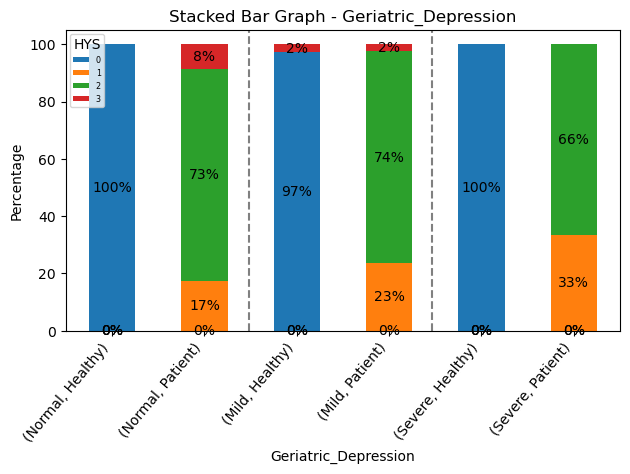

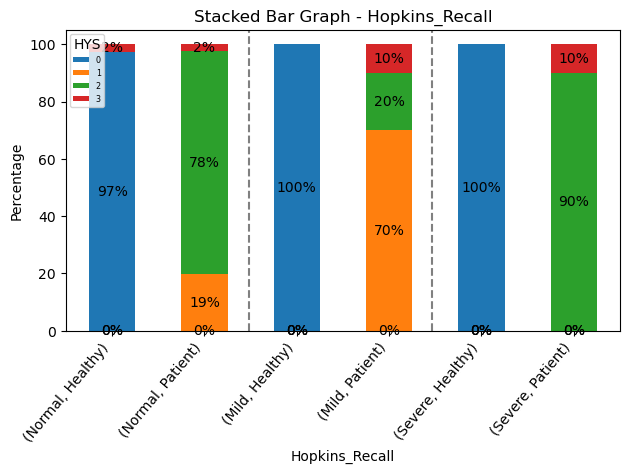

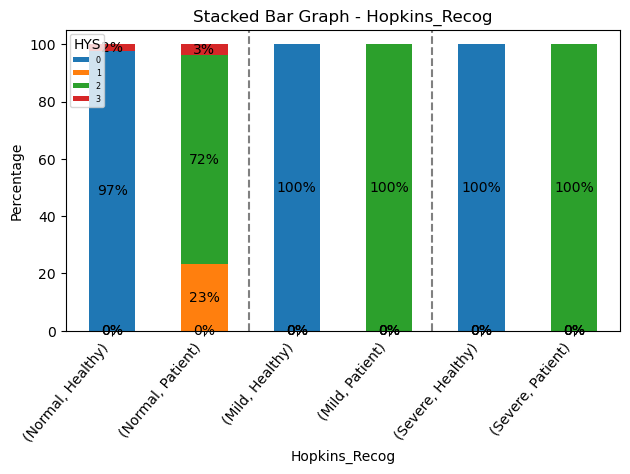

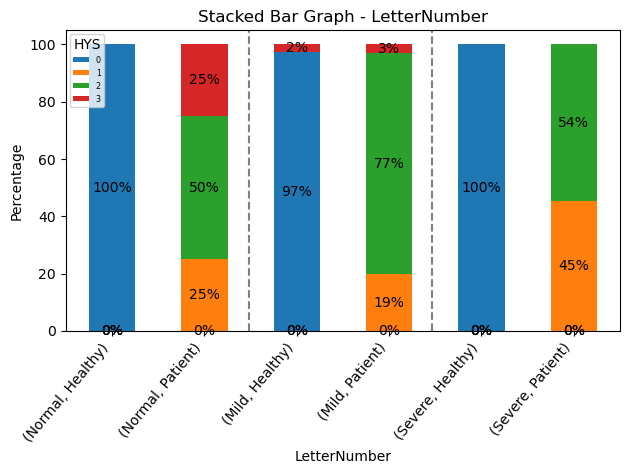

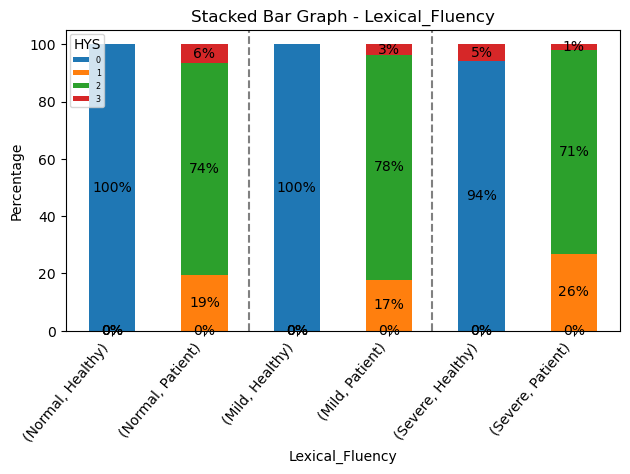

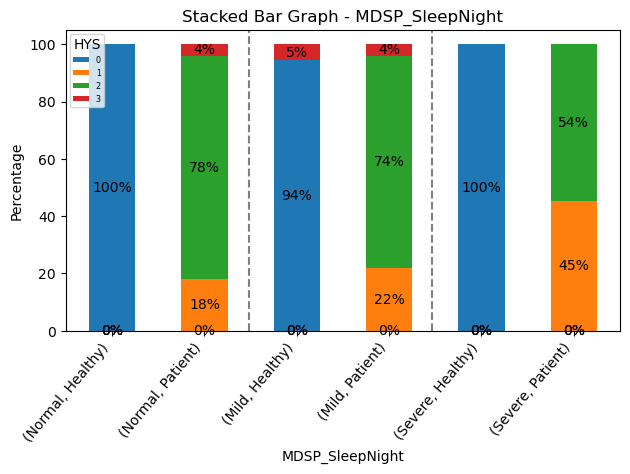

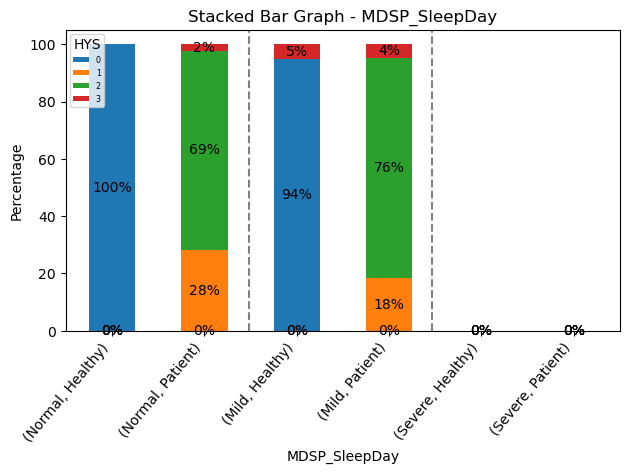

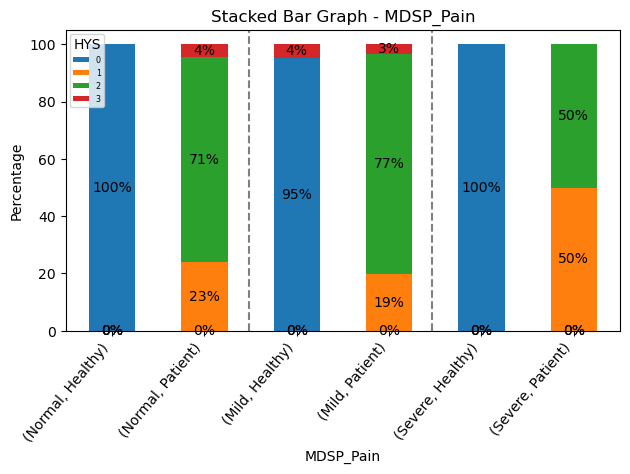

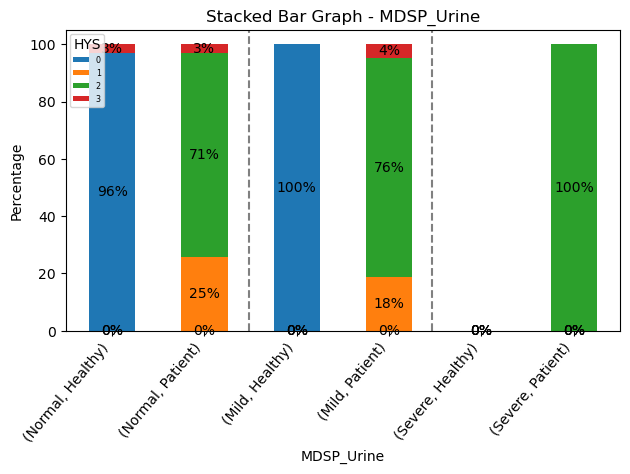

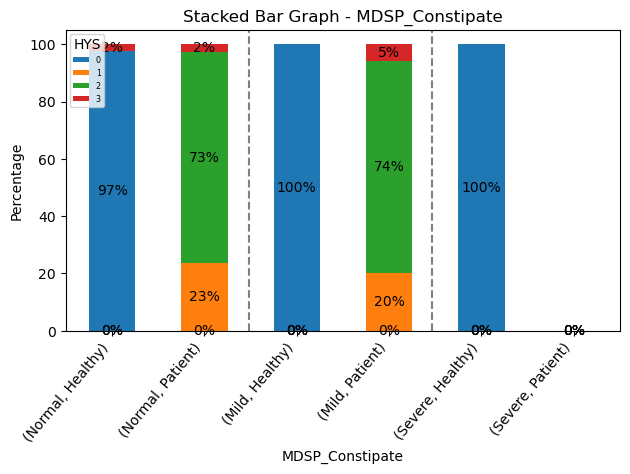

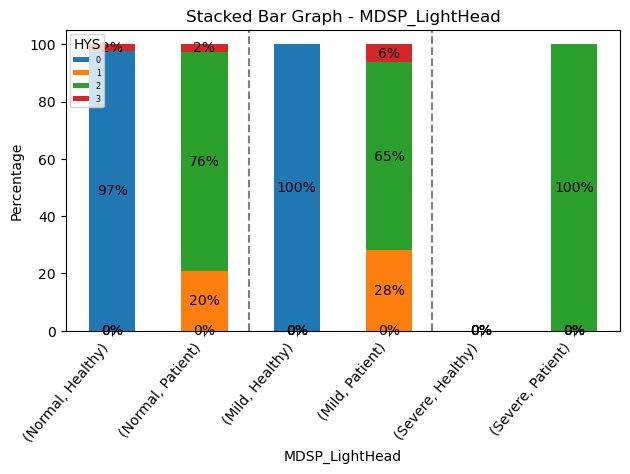

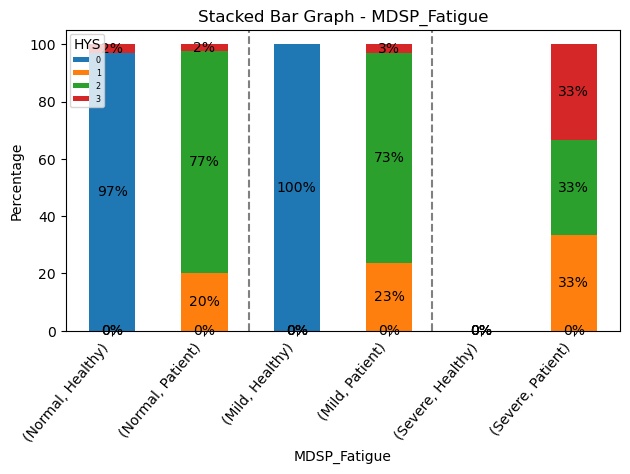

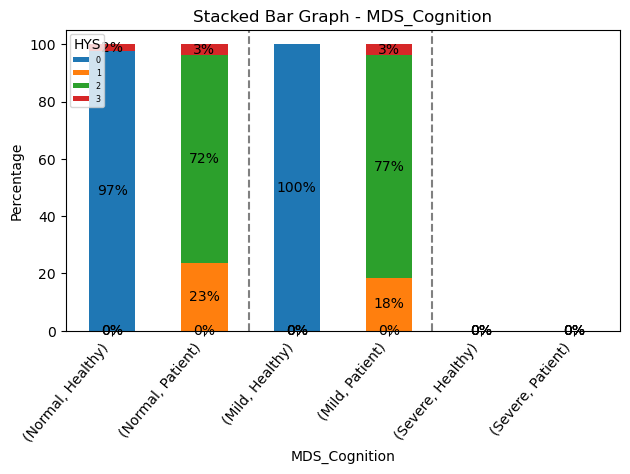

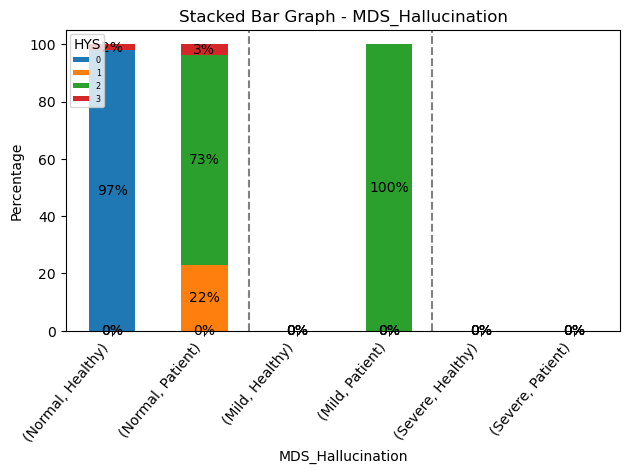

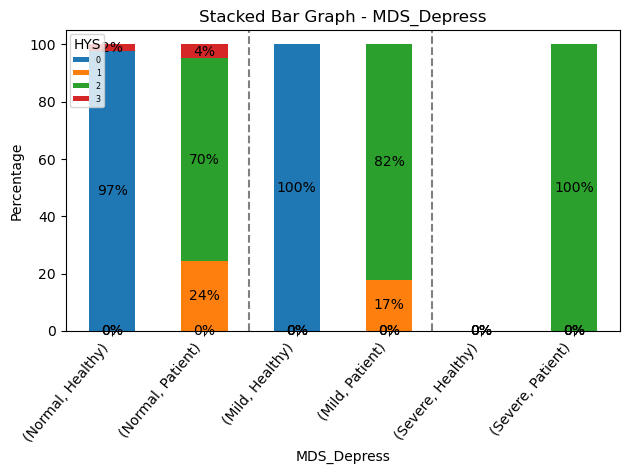

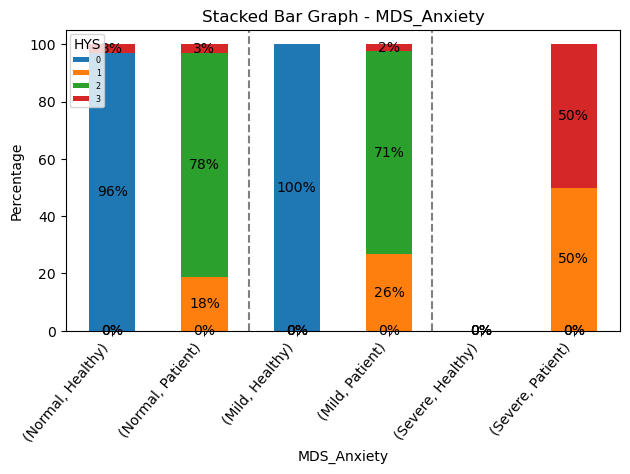

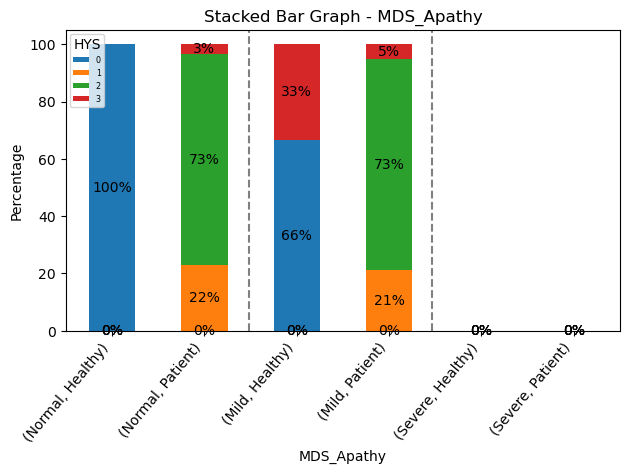

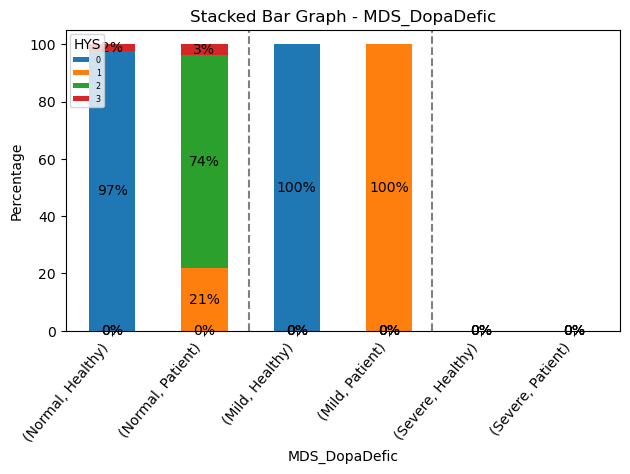

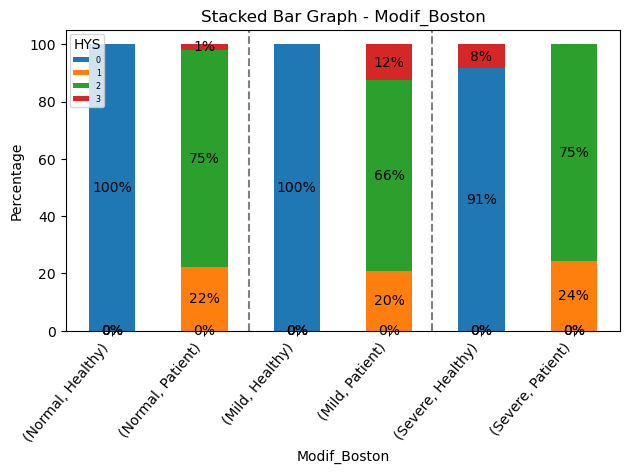

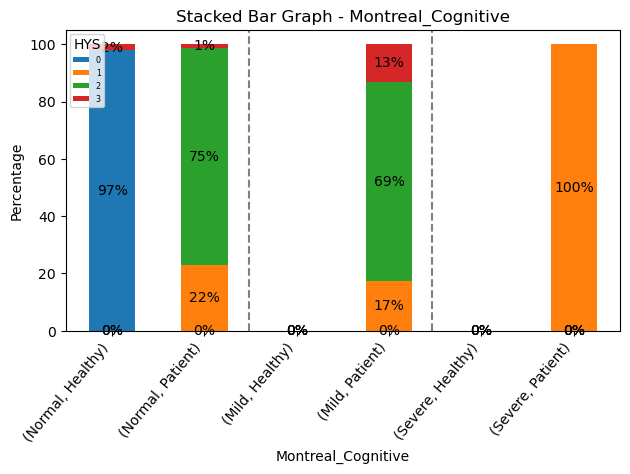

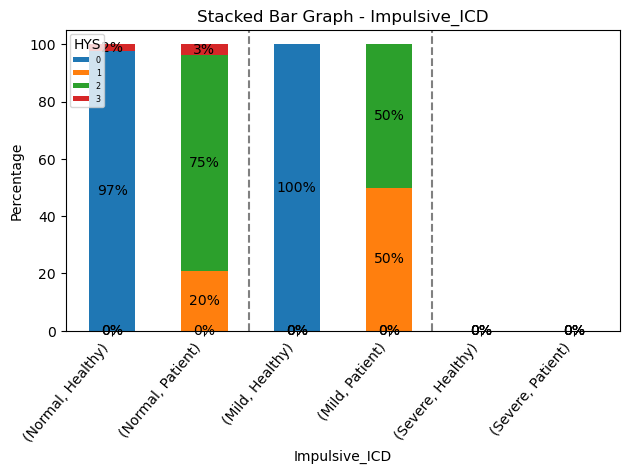

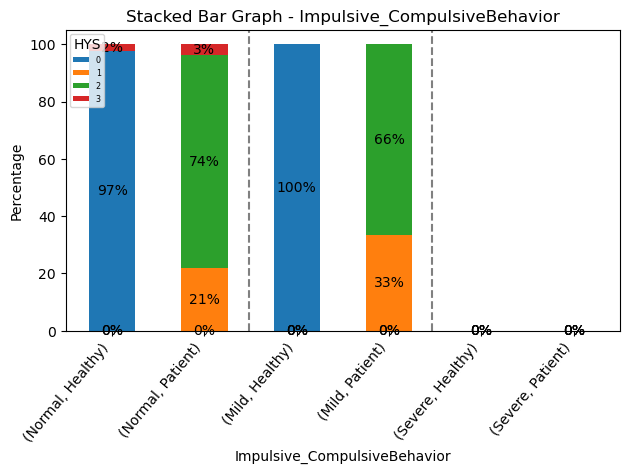

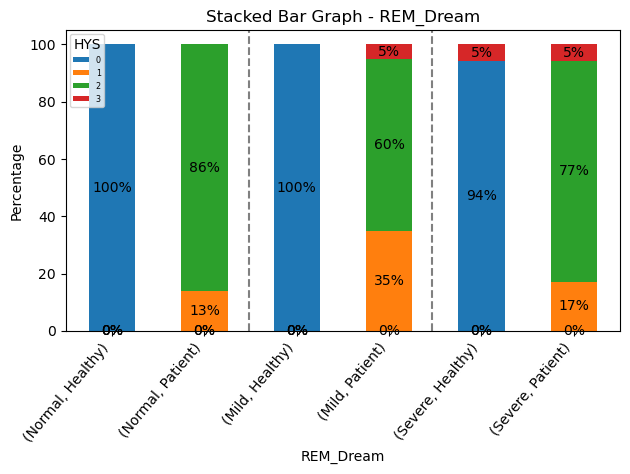

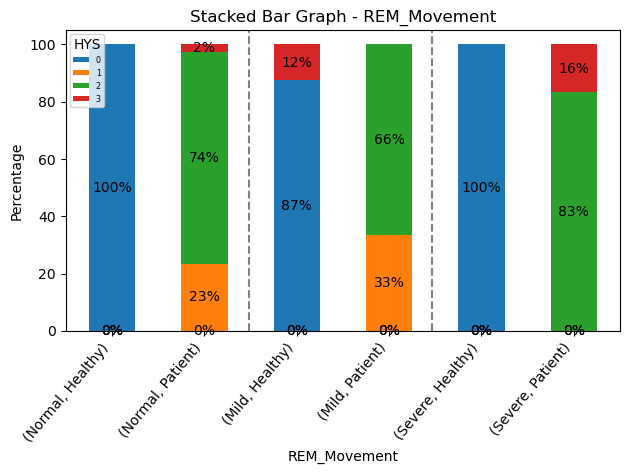

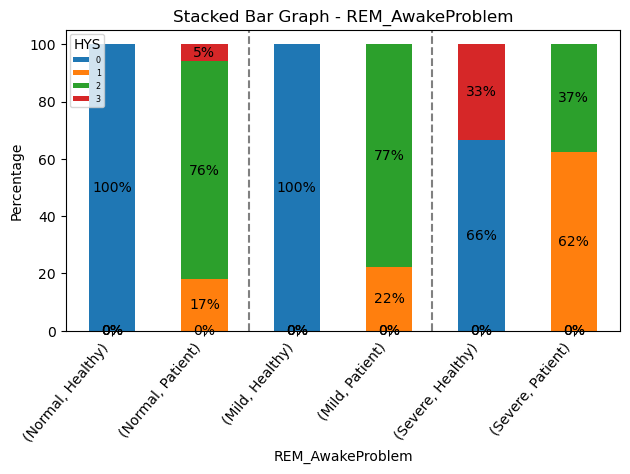

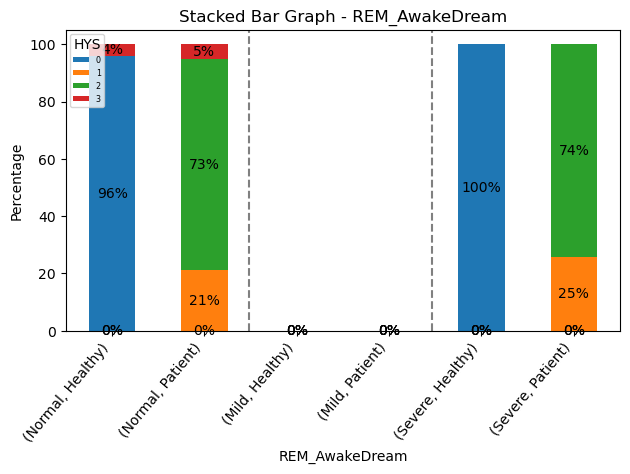

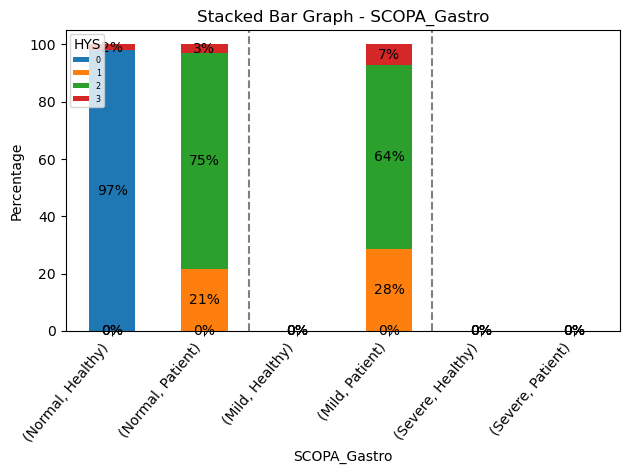

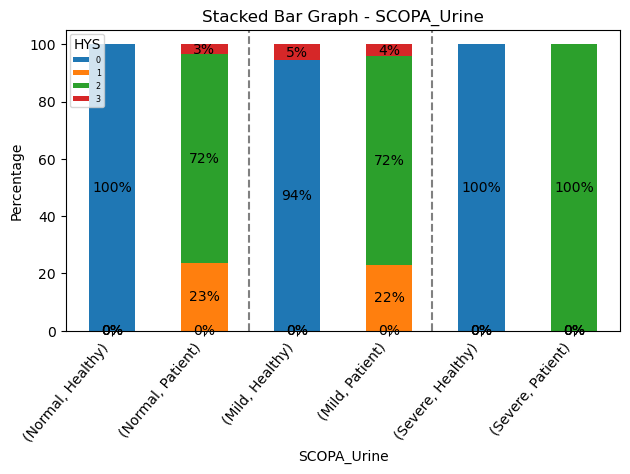

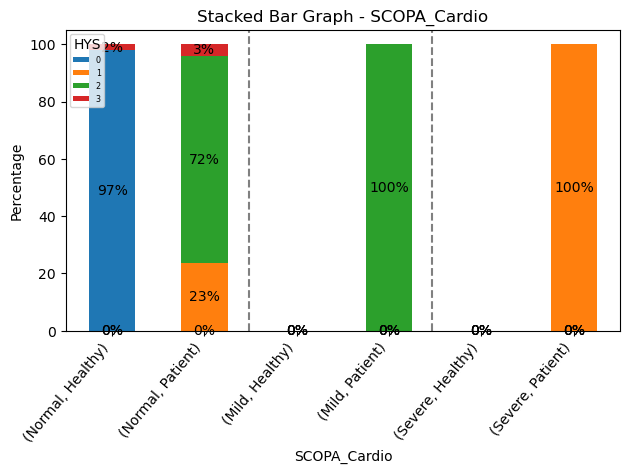

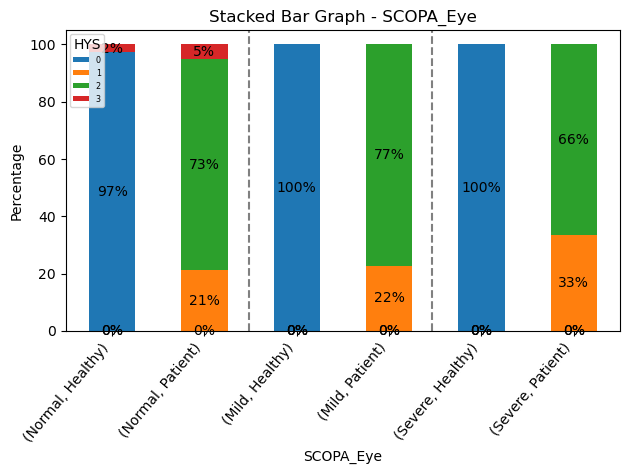

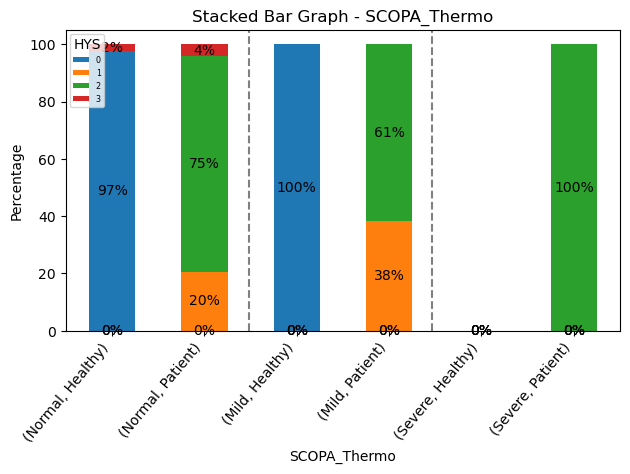

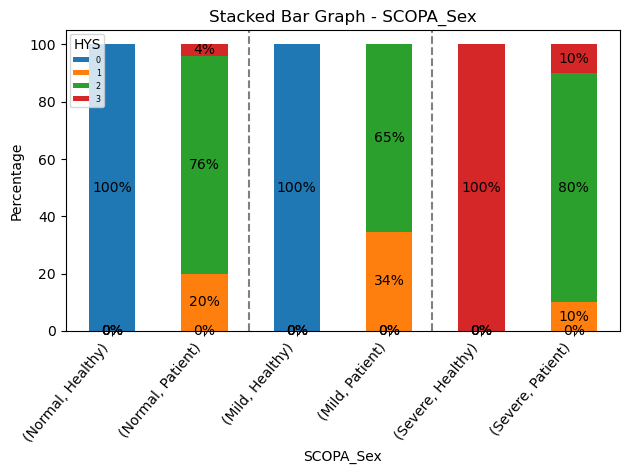

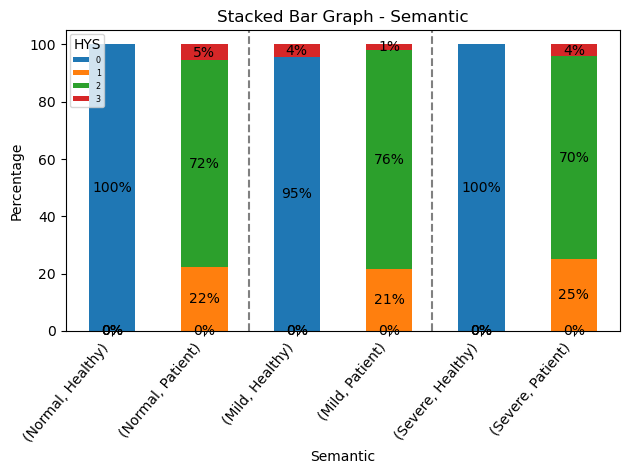

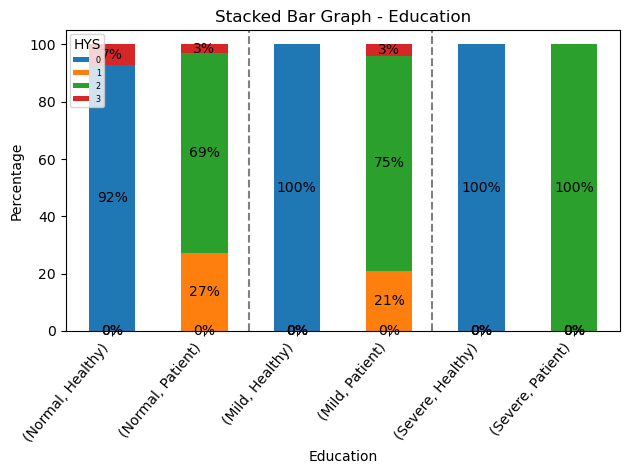

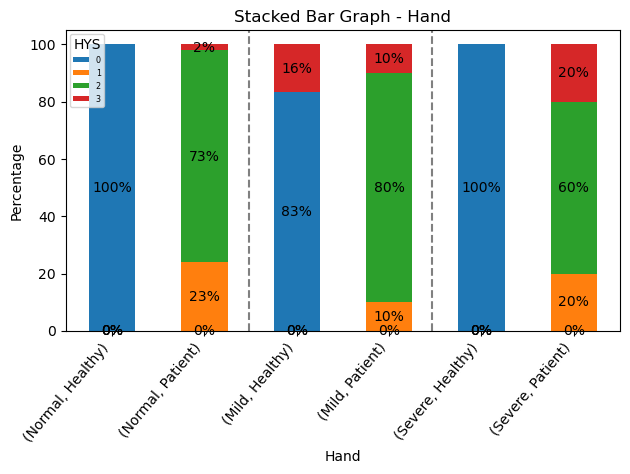

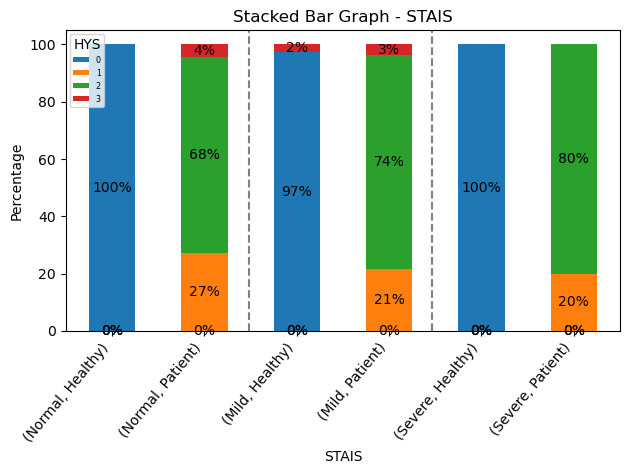

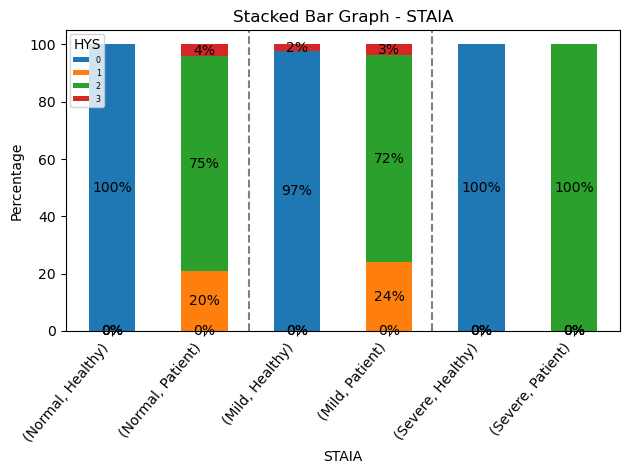

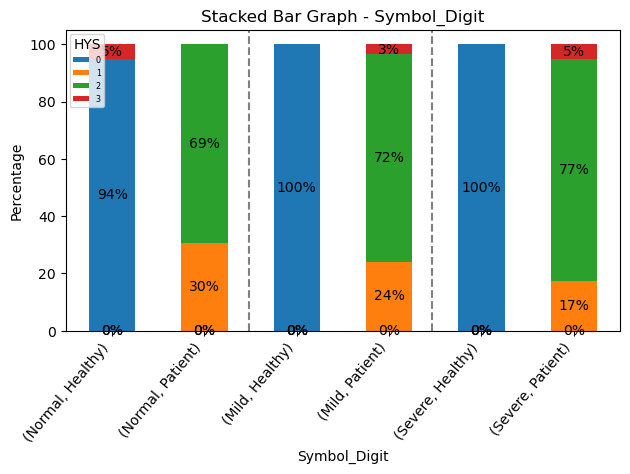

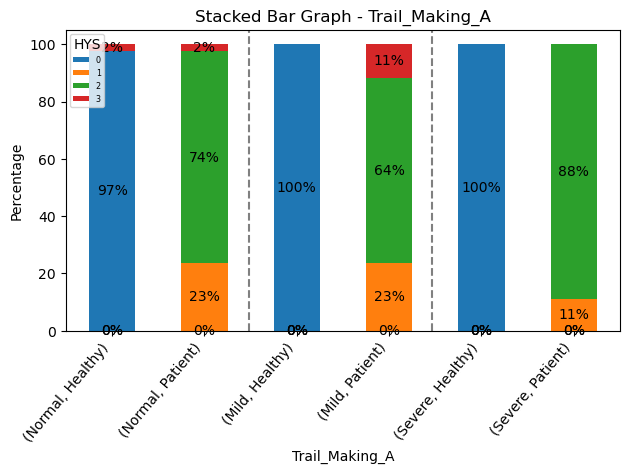

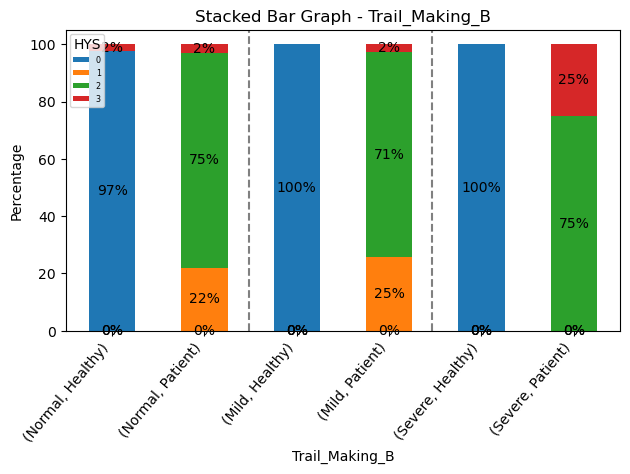

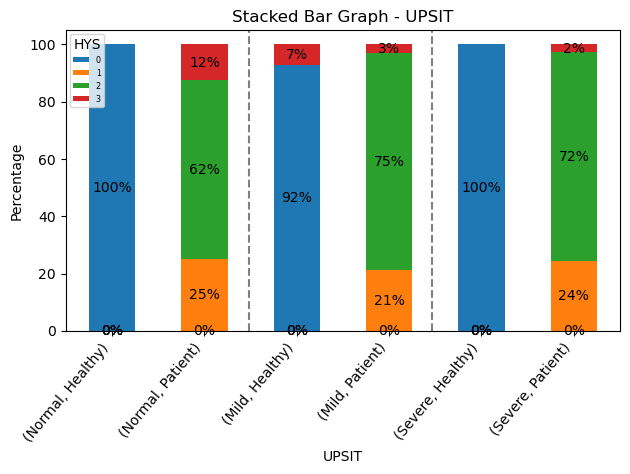

In [22]:
# Get unique values of the independent variables
independent_vars = df.columns[2:]

# Create an empty DataFrame to store the most occurred 'HYS' values
most_occurred_hys_df = pd.DataFrame(columns=['Column', 'APPRDX', 'HYS', 'Count'])

# Define the order of the levels
level_order = ['Normal', 'Mild', 'Severe']

# Iterate over each column
for col in independent_vars:
    # Reorder the values of the column based on the level order
    df[col] = pd.Categorical(df[col], categories=level_order, ordered=True)
    
    # Group the DataFrame by 'APPRDX', the independent variable, and 'HYS', and count occurrences
    counts = df.groupby(['APPRDX', col, 'HYS']).size().reset_index(name='count')
    
    # Find the maximum count for each value of the independent variable
    max_counts = counts.groupby(['APPRDX', col])['count'].idxmax()
    
    # Get the corresponding 'HYS' values with the maximum count
    most_occurred_hys = counts.loc[max_counts, ['APPRDX', col, 'HYS', 'count']]
    
    # Append the results to the most_occurred_hys_df
    most_occurred_hys['Column'] = col
    most_occurred_hys_df = pd.concat([most_occurred_hys_df, most_occurred_hys])

    # Create a stacked bar graph for the current column
    counts_pivot = counts.pivot(index=[col, 'APPRDX'], columns='HYS', values='count').fillna(0)
    # Calculate percentages
    percentages = counts_pivot.div(counts_pivot.sum(axis=1), axis=0) * 100
    
    # Plot the stacked bar graph
    fig, ax = plt.subplots()
    percentages.plot(kind='bar', stacked=True, ax=ax)
    
    # Add vertical lines at 33% and 66% of the plot width
    plot_width = ax.get_xlim()[1] - ax.get_xlim()[0]
    ax.axvline(ax.get_xlim()[0] + 0.33*plot_width, linestyle='--', color='gray')
    ax.axvline(ax.get_xlim()[0] + 0.66*plot_width, linestyle='--', color='gray')

    # Add labels to the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{int(height)}%', (x + width/2, y + height/2), ha='center', va='center')
    
    ax.legend(loc=2, fontsize = 'xx-small',title='HYS')
    legend.get_frame().set_alpha(0.5)
    plt.xticks(rotation=50, ha='right')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.title(f"Stacked Bar Graph - {col}")
    
    # Adjust figure size and margins
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.3)  # Adjust the bottom margin as needed
    
    plt.savefig(f"Stacked_BarGraph_Combined_{col}.svg")
    plt.show()


import numpy as np

# Get unique values of the independent variables
independent_vars = df.columns[2:]

# Create an empty DataFrame to store the most occurred 'HYS' values
most_occurred_hys_df = pd.DataFrame(columns=['Column', 'APPRDX', 'HYS', 'Count'])

# Iterate over each column
for col in independent_vars:
    # Group the DataFrame by 'APPRDX', the independent variable, and 'HYS', and count occurrences
    counts = df.groupby(['APPRDX', col, 'HYS']).size().reset_index(name='count')
    
    # Find the maximum count for each value of the independent variable
    max_counts = counts.groupby(['APPRDX', col])['count'].idxmax()
    
    # Get the corresponding 'HYS' values with the maximum count
    most_occurred_hys = counts.loc[max_counts, ['APPRDX', col, 'HYS', 'count']]
    
    # Append the results to the most_occurred_hys_df
    most_occurred_hys['Column'] = col
    most_occurred_hys_df = pd.concat([most_occurred_hys_df, most_occurred_hys])

    # Create a stacked bar graph for the current column
    counts_pivot = counts.pivot(index=[col, 'APPRDX'], columns='HYS', values='count').fillna(0)
    # Calculate percentages
    percentages = counts_pivot.div(counts_pivot.sum(axis=1), axis=0) * 100
    
     # Plot the stacked bar graph
    fig, ax = plt.subplots()
    percentages.plot(kind='bar', stacked=True, ax=ax)
    
    # Add labels to the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')
    
    plt.legend(loc="upper right")
    plt.xticks(rotation=50)
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.title(f"Stacked Bar Graph - {col}")
    #plt.savefig(f"Stacked_BarGraph_Patient_{col}.svg")
    plt.show()

# Print the most occurred 'HYS' values for each column
print("Most occurred 'HYS' for each column:")
print(most_occurred_hys_df)

